In [1]:
# Import required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Read csv file and store it as a pandas dataframe
# Inspect data
insurance = pd.read_csv('insurance.csv')
print(insurance.shape)
insurance.head()


(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


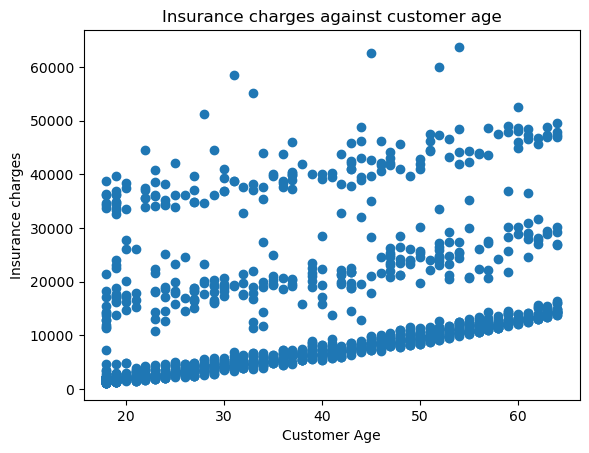

In [4]:
# Define input (X) and output(y) of the model by selecting all rows from the appropriate columns
# Reshape the input column to be a 2D array for modelling
X = insurance.iloc[:,0].values.reshape(-1,1)
y = insurance.iloc[:,6]

# Plot scatter graph of Age against Charges
plt.scatter(X, y)
plt.xlabel('Customer Age')
plt.ylabel('Insurance charges')
plt.title('Insurance charges against customer age')
plt.show()

The initial scatterplot above suggests that although there is an apparent correlation between age and insurance charges, there may be other important independent variables at play. The chart bellow filters out smokers from the dataset to test this hypothesis.

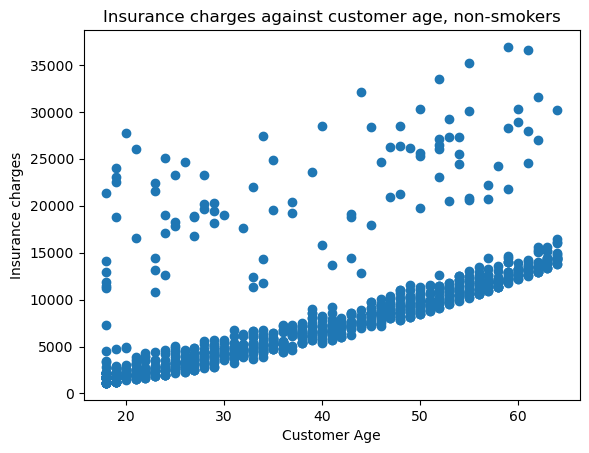

In [5]:
# Filter dataframe to show all records for non-smokers
insurance_ns = insurance[insurance['smoker'] == 'no']
X_ns = insurance_ns.age
y_ns = insurance_ns.charges
plt.scatter(X_ns, y_ns)
plt.xlabel('Customer Age')
plt.ylabel('Insurance charges')
plt.title('Insurance charges against customer age, non-smokers')
plt.show()

The 

The chart above appears to confirm that self-identifying as a smoker adds a premium to insurance charges. There is still a wide variance in the data, suggesting that a further variable may be affecting the output. This could be BMI. Further investigations would be required. In the meantime the limits of accuracy of predictions based on a single linear regression model should be bourne in mind going forward.

In [6]:
# implement linear regression model and fit
ins_model = LinearRegression()
ins_model.fit(X, y)


LinearRegression()

In [7]:
# Predict values for ages beyond the range of the current data
pred_75 = ins_model.predict([[75]])
print(f'The model predicts insurance charges for a 75 year old to be {pred_75}')
pred_85 = ins_model.predict([[85]])
print(f'The model predicts insurance charges for an 85 year old to be {pred_85}')

The model predicts insurance charges for a 75 year old to be [22495.08140608]
The model predicts insurance charges for an 85 year old to be [25072.30759275]


In [8]:
# Create predictions for y values by using the model, including the new theoretical datapoint
pred_X = np.append(X, 85).reshape(-1,1)
pred_y = ins_model.predict(pred_X)

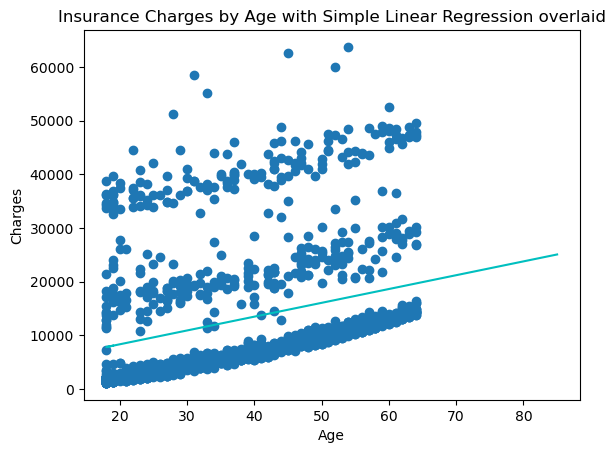

In [9]:
# Overlay the line of best fit from the model with the original scatter plot
plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Insurance Charges by Age with Simple Linear Regression overlaid')
plt.plot(pred_X, pred_y, color='c')
plt.show()

The chart above confirms the suspicion that a single linear regression for the whole dataset is not a good model for predicting insurances charges unknown values of age unless other variables are taken into account. Testing the model using cross-validation further confirms this suspicion. A better approach might be to split the data set into categories for smokers and non-smokers, with sub-categories of high and low BMI. Linear regressions for each group might prove more accurate at predicting charges for customers of a given age.

In [10]:
slope = ins_model.coef_
intercept = ins_model.intercept_
print(slope)
print(intercept)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(ins_model, X.reshape(-1,1), y, cv=10)
mean_score = np.mean(scores)
std_score = np.std(scores)
print(mean_score)
print(std_score)

[257.72261867]
3165.8850060630157
0.08253346158337399
0.050090392064513566
